In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, explained_variance_score, confusion_matrix, classification_report, log_loss, roc_curve, roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from sklearn.datasets import make_classification 
#from metrics import confusion_matrix

import math

In [2]:
# import data

loanData=pd.read_csv('./loans.csv')

# display first 5 records

loanData.head(5)

,Customer ID,Fictional Surname,Age,Gender,Years at address,Employment status,Country,Current debt,Postcode,Income,Own home,CCJs,Loan amount,Outcome
0,945780,Miah,19,F,2,Unemployed,UK,0,TA3 7SH,45500,Rent,1,13234,Paid
1,747989,Hollis,66,F,13,Unemployed,UK,1080,WV6 8SU,18000,Own,0,5561,Paid
2,790344,Barker,48,F,4,Self Employed,UK,3690,BT15 5HG,47500,Rent,1,28288,Paid
3,597668,Titford,67,F,47,Self Employed,UK,6560,GU10 3NH,36000,Mortgage,0,30199,Paid
4,794971,Berry,70,M,8,Self Employed,UK,9100,GL6 6UB,50500,Own,0,35078,Paid


In [3]:
# check data types
loanData.dtypes

Customer ID           int64
Fictional Surname    object
Age                   int64
Gender               object
Years at address      int64
Employment status    object
Country              object
Current debt          int64
Postcode             object
Income                int64
Own home             object
CCJs                  int64
Loan amount           int64
Outcome              object
dtype: object

In [4]:
# check shape
loanData.shape

(2000, 14)

###################################

#       DATA PREPARATION

###################################

### remove unused columns

In [5]:
loanData=loanData.drop(columns=['Customer ID','Fictional Surname','Country','Postcode'])
loanData.head(5)

,Age,Gender,Years at address,Employment status,Current debt,Income,Own home,CCJs,Loan amount,Outcome
0,19,F,2,Unemployed,0,45500,Rent,1,13234,Paid
1,66,F,13,Unemployed,1080,18000,Own,0,5561,Paid
2,48,F,4,Self Employed,3690,47500,Rent,1,28288,Paid
3,67,F,47,Self Employed,6560,36000,Mortgage,0,30199,Paid
4,70,M,8,Self Employed,9100,50500,Own,0,35078,Paid


### check for null values

In [6]:
loanData.isnull().sum()

Age                  0
Gender               0
Years at address     0
Employment status    0
Current debt         0
Income               0
Own home             0
CCJs                 0
Loan amount          0
Outcome              0
dtype: int64

### check for nan values

In [7]:
loanData.isna().sum()

Age                  0
Gender               0
Years at address     0
Employment status    0
Current debt         0
Income               0
Own home             0
CCJs                 0
Loan amount          0
Outcome              0
dtype: int64

### check for duplicates and drop them

In [8]:
loanData.duplicated()
loanData.drop_duplicates()

,Age,Gender,Years at address,Employment status,Current debt,Income,Own home,CCJs,Loan amount,Outcome
0,19,F,2,Unemployed,0,45500,Rent,1,13234,Paid
1,66,F,13,Unemployed,1080,18000,Own,0,5561,Paid
2,48,F,4,Self Employed,3690,47500,Rent,1,28288,Paid
3,67,F,47,Self Employed,6560,36000,Mortgage,0,30199,Paid
4,70,M,8,Self Employed,9100,50500,Own,0,35078,Paid
...,...,...,...,...,...,...,...,...,...,...
1995,60,F,4,Self Employed,2900,22500,Own,1,15725,Paid
1996,24,F,7,Self Employed,5130,38000,Own,0,35911,Paid
1997,34,M,5,Unemployed,6530,41500,Own,2,6874,Paid
1998,52,F,2,Employed,930,32500,Own,0,5412,Paid


## Go through each column, graph the data, and perform exploratory analysis

### 1. Gender column

<AxesSubplot:title={'center':'Gender counts'}>

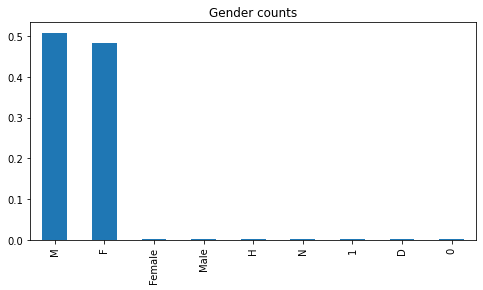

In [9]:

loanData['Gender'].value_counts(normalize=True).plot.bar(figsize=(8,4),title='Gender counts')


<AxesSubplot:title={'center':'Gender counts'}>

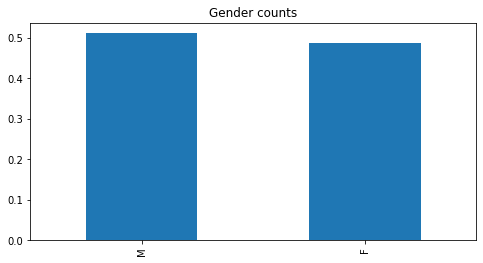

In [10]:

###########     clean gender data    ###############

loanData['Gender'].replace(['Female','Male','H','N','1','D','0'],['F','M','F','M','M','F','F'], inplace=True)
loanData['Gender'].value_counts(normalize=True).plot.bar(figsize=(8,4),title='Gender counts')


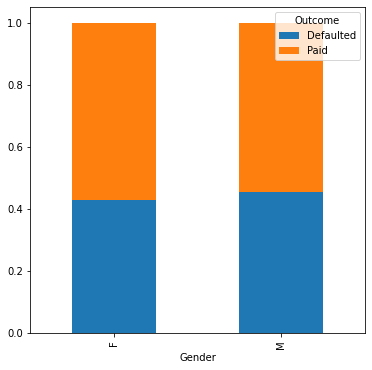

In [11]:
gender_vs_outcome=pd.crosstab(loanData['Gender'],loanData['Outcome'])
gender_vs_outcome.div(gender_vs_outcome.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,6))
plt.show()

In [12]:
#########################################################
#########################################################
#########################################################



### 2. Employment status column

<AxesSubplot:title={'center':'Employment status counts'}>

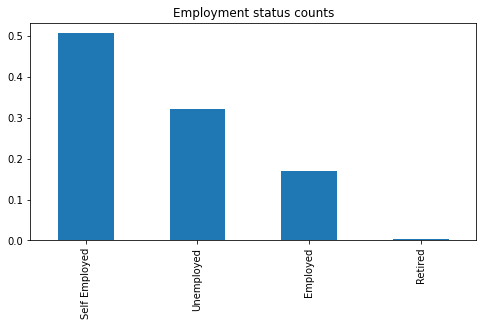

In [13]:

###########     Employment status graphs    ###############
emp=loanData[(loanData['Employment status']=='Retired')]
#print(emp)

loanData['Employment status'].value_counts(normalize=True).plot.bar(figsize=(8,4),title='Employment status counts')

<AxesSubplot:title={'center':'Employment status counts'}>

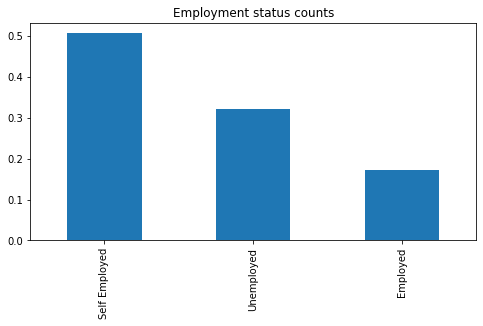

In [14]:

###########     clean employment status data    ###############

loanData['Employment status'].replace(['Retired'],['Employed'], inplace=True)
loanData['Employment status'].value_counts(normalize=True).plot.bar(figsize=(8,4),title='Employment status counts')

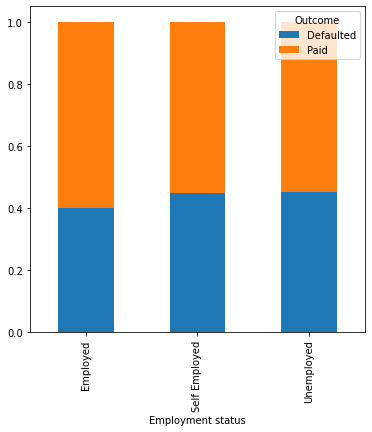

In [15]:
empStat_vs_outcome=pd.crosstab(loanData['Employment status'],loanData['Outcome'])
empStat_vs_outcome.div(empStat_vs_outcome.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,6))
plt.show()

In [16]:
#################################################################
#################################################################
#################################################################




### 3. Own homes column


<AxesSubplot:title={'center':'Own home counts'}>

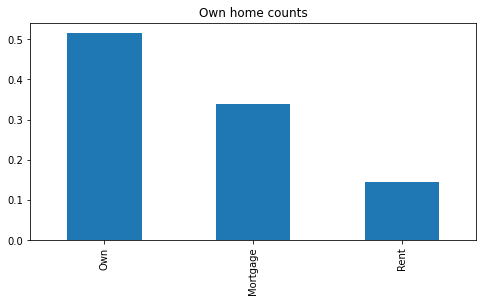

In [17]:

###########     Own homes graphs    ###############

loanData['Own home'].value_counts(normalize=True).plot.bar(figsize=(8,4),title='Own home counts')


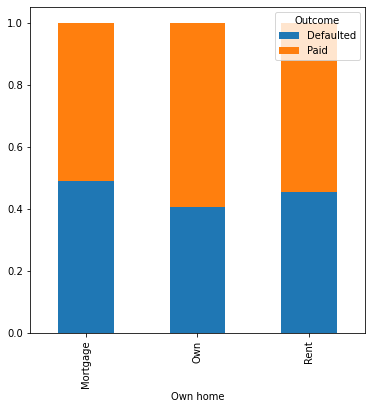

In [18]:
ownHome_vs_outcome=pd.crosstab(loanData['Own home'],loanData['Outcome'])
ownHome_vs_outcome.div(ownHome_vs_outcome.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,6))
plt.show()

In [19]:
#################################################################
#################################################################
#################################################################




### 4. Outcome column 

<AxesSubplot:title={'center':'Outcome counts'}>

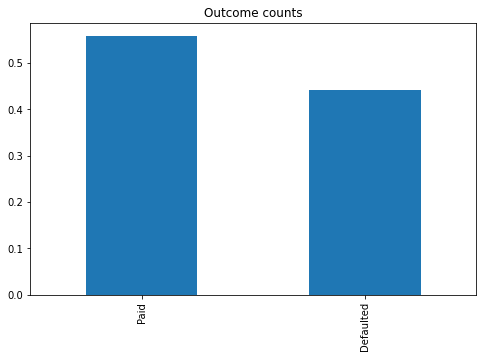

In [20]:

###########     Loan Outcome graphs    ###############

loanData['Outcome'].value_counts(normalize=True).plot.bar(figsize=(8,5),title='Outcome counts')


In [21]:
#################################################################
#################################################################
#################################################################



### 5. Age column

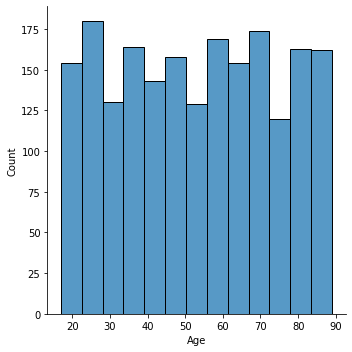

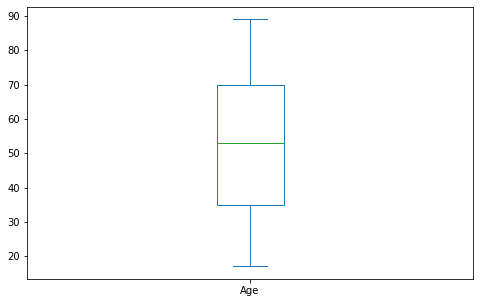

In [22]:
sns.displot(loanData['Age'])
plt.show()
loanData['Age'].plot.box(figsize=(8,5))
plt.show()

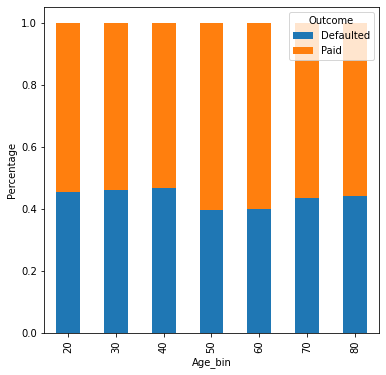

In [23]:
bins=[20,30,40,50,60,70,80,90]
ageBins=pd.DataFrame()
ageBins['Age_bin']=pd.cut(loanData['Age'],bins,labels=bins[:7])
age_vs_outcome=pd.crosstab(ageBins['Age_bin'],loanData['Outcome'])
age_vs_outcome.div(age_vs_outcome.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,6))
plt.ylabel('Percentage')
plt.show()

In [24]:
#################################################################
#################################################################
#################################################################



### 6. Years at address column

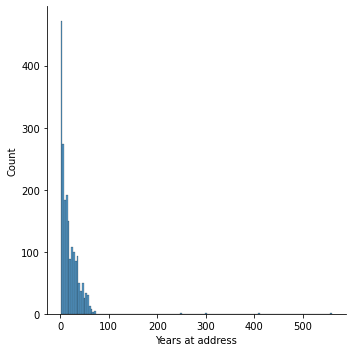

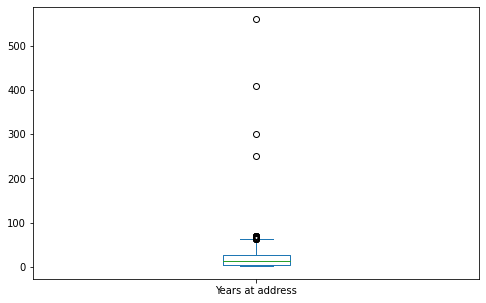

In [25]:
#   plot initial graphs

sns.displot(loanData['Years at address'])
plt.show()
loanData['Years at address'].plot.box(figsize=(8,5))
plt.show()

In [26]:
#####  THIS SECTION WAS RUN TWICE !!!!  #####

# find upper and lower bound

q3,q1=np.percentile(np.array(loanData['Years at address']),[75,25])
# print(q3,q1)
intrQuartRange=q3-q1
# print(intrQuartRange)
upperBound=q3+(1.5*intrQuartRange)
lowerBound=q1-(1.5*intrQuartRange)

loanData.loc[loanData['Years at address']>upperBound,'Years at address']=np.nan
loanData.loc[loanData['Years at address']<lowerBound,'Years at address']=np.nan

# confirm null values added
# print(loanData.isnull().sum())

# find mean
mean = math.floor(loanData['Years at address'].mean())

# replace null values with mean

loanData['Years at address'].fillna(mean,inplace=True)
# print(loanData.isnull().sum())




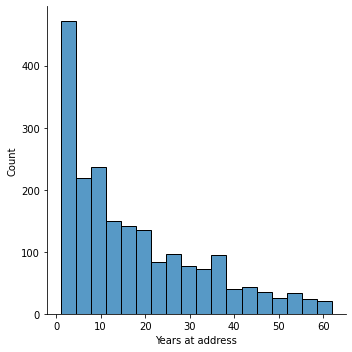

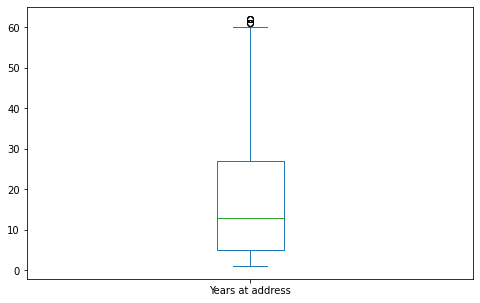

In [27]:
#   plot graphs with outliers removed

sns.displot(loanData['Years at address'])
plt.show()
loanData['Years at address'].plot.box(figsize=(8,5))
plt.show()

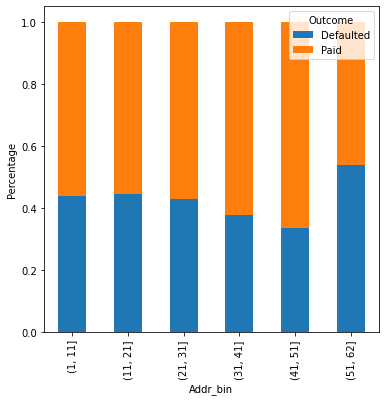

In [28]:
addrBins=np.linspace(min(loanData['Years at address']),max(loanData['Years at address']),7,dtype="int")
df=pd.DataFrame()
df['Addr_bin']=pd.cut(loanData['Years at address'],addrBins)
addr_vs_outcome=pd.crosstab(df['Addr_bin'],loanData['Outcome'])
addr_vs_outcome.div(addr_vs_outcome.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,6))
plt.ylabel('Percentage')
plt.show()

In [29]:
#################################################################
#################################################################
#################################################################



### 7. Current debt column

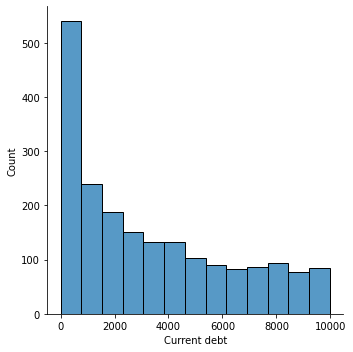

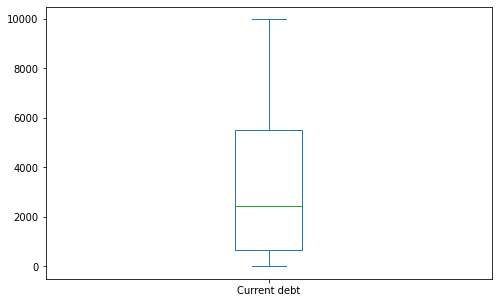

In [30]:
sns.displot(loanData['Current debt'])
plt.show()
loanData['Current debt'].plot.box(figsize=(8,5))
plt.show()

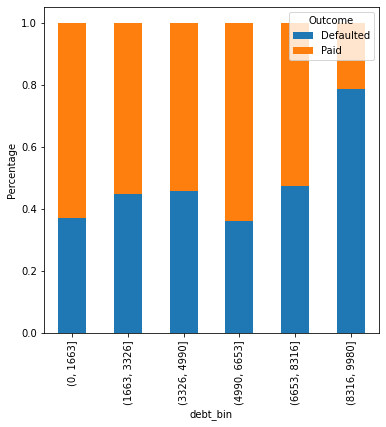

In [31]:
debtBins=np.linspace(min(loanData['Current debt']),max(loanData['Current debt']),7,dtype="int")
df=pd.DataFrame()
df['debt_bin']=pd.cut(loanData['Current debt'],debtBins)
debt_vs_outcome=pd.crosstab(df['debt_bin'],loanData['Outcome'])
debt_vs_outcome.div(debt_vs_outcome.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,6))
plt.ylabel('Percentage')
plt.show()

In [32]:
#################################################################
#################################################################
#################################################################

### 8. income column

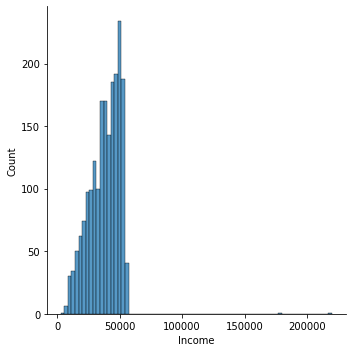

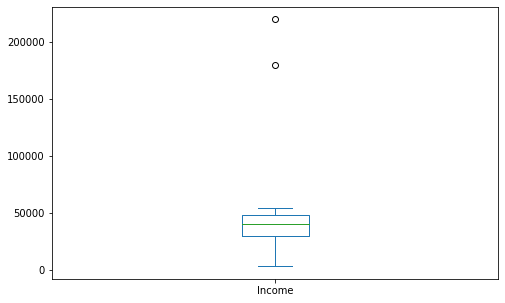

In [33]:
#####  plot initial graphs  #####
sns.displot(loanData['Income'])
plt.show()
loanData['Income'].plot.box(figsize=(8,5))
plt.show()

In [34]:
# find upper and lower bound

q3,q1=np.percentile(np.array(loanData['Income']),[75,25])
# print(q3,q1)
intrQuartRange=q3-q1
# print(intrQuartRange)
upperBound=q3+(1.5*intrQuartRange)
lowerBound=q1-(1.5*intrQuartRange)

loanData.loc[loanData['Income']>upperBound,'Income']=np.nan
loanData.loc[loanData['Income']<lowerBound,'Income']=np.nan

# confirm null values added
# print(loanData.isnull().sum())

# find mean
mean = math.floor(loanData['Income'].mean())

# replace null values with mean

loanData['Income'].fillna(mean,inplace=True)
# print(loanData.isnull().sum())


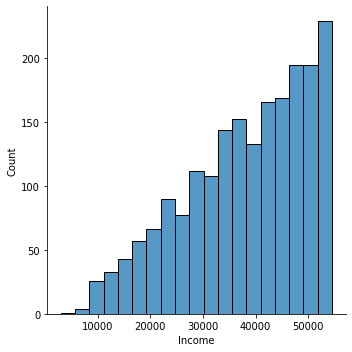

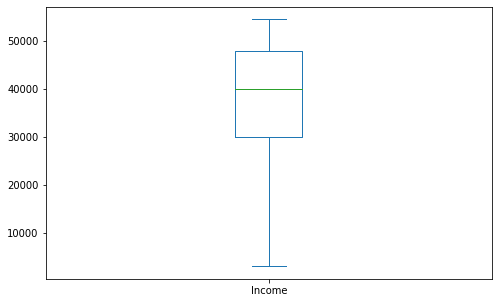

In [35]:
#####  plot graphs without outliers  #####
sns.displot(loanData['Income'])
plt.show()
loanData['Income'].plot.box(figsize=(8,5))
plt.show()

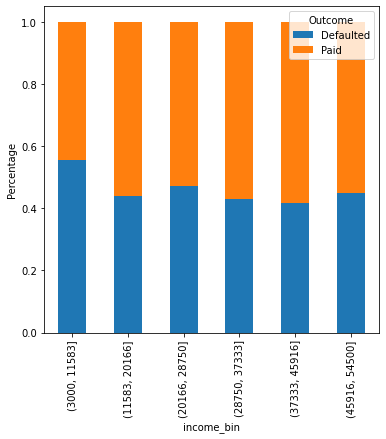

In [36]:
incomeBins=np.linspace(min(loanData['Income']),max(loanData['Income']),7,dtype="int")
df=pd.DataFrame()
df['income_bin']=pd.cut(loanData['Income'],incomeBins)
income_vs_outcome=pd.crosstab(df['income_bin'],loanData['Outcome'])
income_vs_outcome.div(income_vs_outcome.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,6))
plt.ylabel('Percentage')
plt.show()

In [37]:
#################################################################
#################################################################
#################################################################

### 9. CCJS column

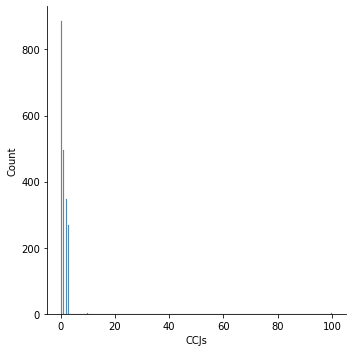

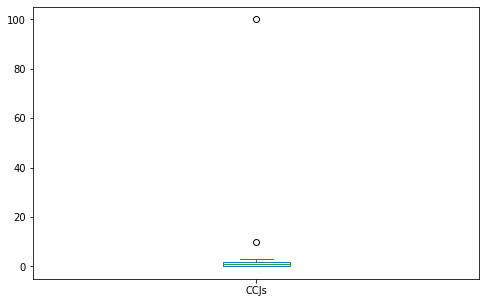

In [38]:

#####  plot initial graphs  #####
sns.displot(loanData['CCJs'])
plt.show()
loanData['CCJs'].plot.box(figsize=(8,5))
plt.show()

In [39]:
# find upper and lower bound

q3,q1=np.percentile(np.array(loanData['CCJs']),[75,25])
# # print(q3,q1)
intrQuartRange=q3-q1
# # print(intrQuartRange)
upperBound=q3+(1.5*intrQuartRange)
lowerBound=q1-(1.5*intrQuartRange)

loanData.loc[loanData['CCJs']>upperBound,'CCJs']=np.nan
loanData.loc[loanData['CCJs']<lowerBound,'CCJs']=np.nan

# confirm null values added
# print(loanData.isnull().sum())

# find mode
mode = loanData['CCJs'].mode()
# print(mode[0])

# replace null values with mean

loanData['CCJs'].fillna(mode[0],inplace=True)
print(loanData.isna().sum())

Age                  0
Gender               0
Years at address     0
Employment status    0
Current debt         0
Income               0
Own home             0
CCJs                 0
Loan amount          0
Outcome              0
dtype: int64


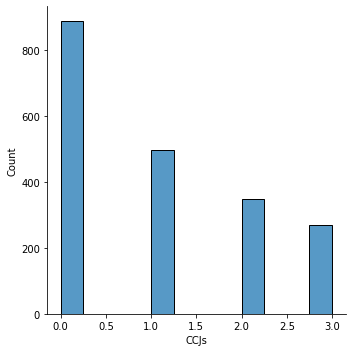

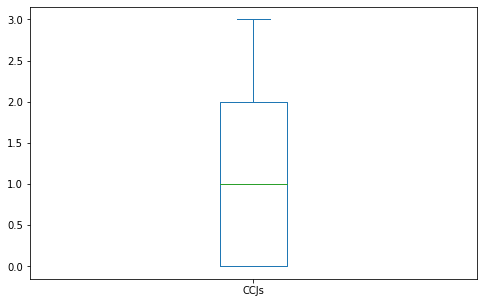

In [40]:

#####  plot adjusted graphs  #####
sns.displot(loanData['CCJs'])
plt.show()
loanData['CCJs'].plot.box(figsize=(8,5))
plt.show()


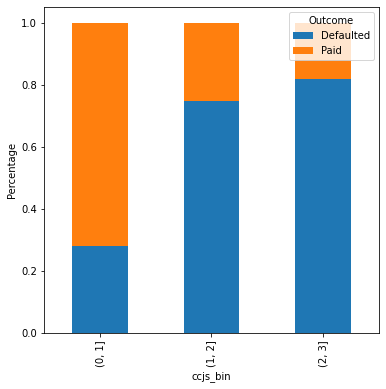

In [41]:
ccjsBins=[0,1,2,3]
df=pd.DataFrame()
df['ccjs_bin']=pd.cut(loanData['CCJs'],ccjsBins)
ccjs_vs_outcome=pd.crosstab(df['ccjs_bin'],loanData['Outcome'])
ccjs_vs_outcome.div(ccjs_vs_outcome.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,6))
plt.ylabel('Percentage')
plt.show()

In [42]:
#################################################################
#################################################################
#################################################################

### 10. Loan amount column

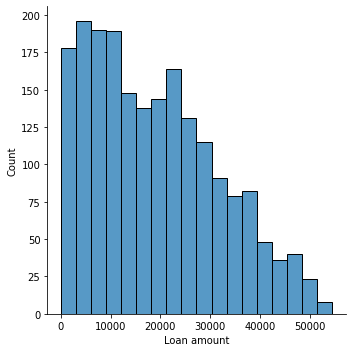

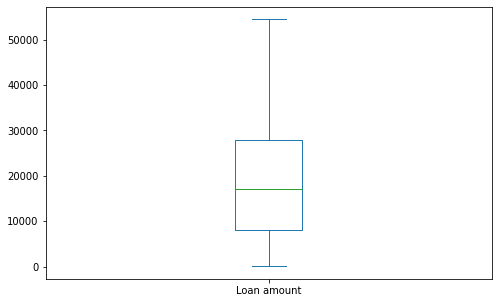

In [43]:

#####  plot initial graphs  #####
sns.displot(loanData['Loan amount'])
plt.show()
loanData['Loan amount'].plot.box(figsize=(8,5))
plt.show()

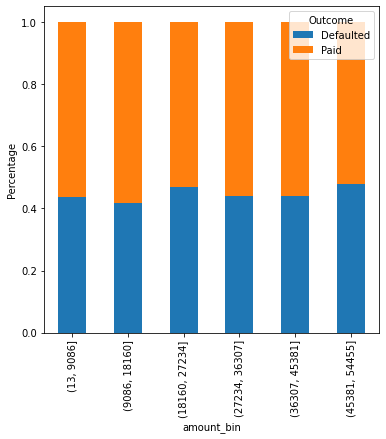

In [44]:
amountBins=np.linspace(min(loanData['Loan amount']),max(loanData['Loan amount']),7,dtype="int")
df=pd.DataFrame()
df['amount_bin']=pd.cut(loanData['Loan amount'],amountBins)
amount_vs_outcome=pd.crosstab(df['amount_bin'],loanData['Outcome'])
amount_vs_outcome.div(amount_vs_outcome.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(6,6))
plt.ylabel('Percentage')
plt.show()

In [45]:
#################################################################
#################################################################
#################################################################

In [46]:
#################################################################

#     REPLACE CATEGORICAL VALUES WITH NUMERIC VALUES

#################################################################

In [47]:
loanData['Gender'].replace(['F','M'],[0,1],inplace=True)
loanData['Employment status'].replace(['Unemployed','Self Employed','Employed'],[0,1,2],inplace=True)
loanData['Own home'].replace(['Rent','Mortgage','Own'],[0,1,2],inplace=True)
loanData['Outcome'].replace(['Defaulted','Paid'],[0,1],inplace=True)

In [48]:
##############################################################

## Correlate the variables:

<AxesSubplot:>

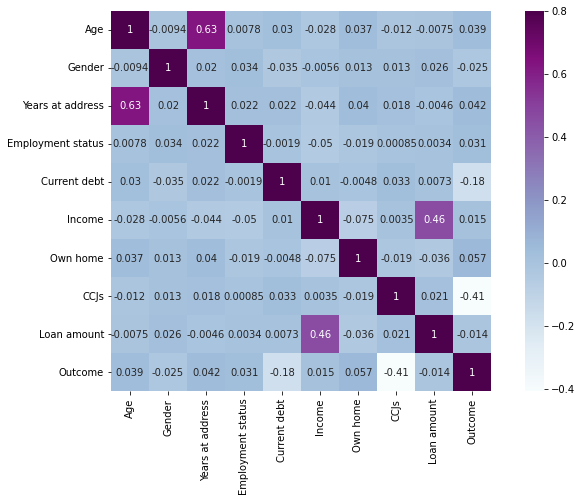

In [49]:
matrix=loanData.corr()
f, ax = plt.subplots(figsize=(12,7))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu",annot=True)

In [50]:
##############################################################

# BEGIN MODELING

## Prepare data

In [51]:
# preprocess data. Convert strings to usable values

le = preprocessing.LabelEncoder()
loanData=loanData.apply(le.fit_transform)

loanData.head()

,Age,Gender,Years at address,Employment status,Current debt,Income,Own home,CCJs,Loan amount,Outcome
0,2,0,1,0,0,80,0,1,776,1
1,49,0,12,0,107,24,2,0,333,1
2,31,0,3,1,344,84,0,1,1467,1
3,50,0,46,1,555,60,1,0,1543,1
4,53,1,7,1,726,90,2,0,1683,1


In [52]:
X = loanData.drop(columns='Outcome').values
X
y = loanData['Outcome']
# y = y.astype(int)  # convert y values to int if not already done
y

print(X.shape)
print(y.shape) 

(2000, 9)
(2000,)


In [53]:
# Hold-out Validation (split data 70 = training,20 = validation,10 = testing)

#first one 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state = 15)

#second one
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, test_size= 0.1, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(1440, 9)
(400, 9)
(160, 9)
(1440,)
(400,)
(160,)


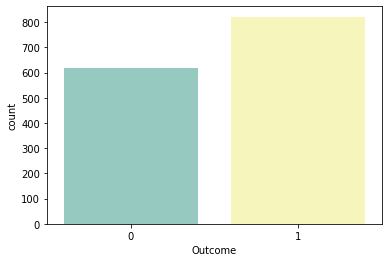

In [54]:
# Investigate the distribution of all y's (make sure datasets are balanced)

ax = sns.countplot(x = y_train, palette = "Set3")

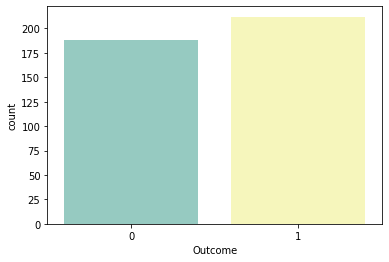

In [55]:
ax = sns.countplot(x = y_test, palette = "Set3")

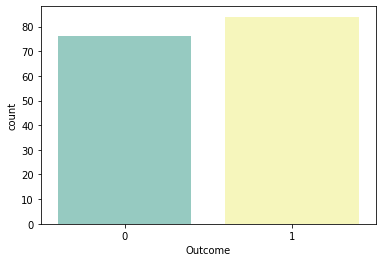

In [56]:
ax = sns.countplot(x = y_valid, palette = "Set3")

## 1. Logistic regression 

In [57]:
# Training my model
log_reg = LogisticRegression(random_state=10, solver = 'liblinear' )
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=10, solver='liblinear')

In [58]:
# Methods we can use in Logistic

# Predict - Predict class labels for samples in X
log_reg.predict(X_train)
y_pred = log_reg.predict(X_train)

print('Predictions: ', y_pred, '\n')
# log_reg.predict(X_train).shape - check if all rows are there

# Predict_proba - Probability estimates 
pred_proba = log_reg.predict_proba(X_train)
print('Probability: ', pred_proba, '\n')
# coef_ - Coefficient of the features in the decision function
log_reg.coef_
# score - Returns the mean accuracy on the given test data and labels - below

Predictions:  [1 1 1 ... 0 0 1] 

Probability:  [[0.17648134 0.82351866]
 [0.19668671 0.80331329]
 [0.32014145 0.67985855]
 ...
 [0.52771123 0.47228877]
 [0.66565225 0.33434775]
 [0.18119951 0.81880049]] 



array([[-2.64351987e-03, -3.05077688e-02,  1.09428658e-02,
         1.00486460e-01, -1.56679673e-03,  7.67000720e-04,
         2.22399871e-01, -9.24306257e-01,  6.68689969e-05]])

## Evaluating Methods

In [59]:
# Accuracy on Train
print('The Training Accuracy is: ', log_reg.score(X_train, y_train))

# Accuracy on Test
print('The Testing Accuracy is: ', log_reg.score(X_test, y_test))
print('\n')
# Classification Report
print(classification_report(y_train, y_pred))

The Training Accuracy is:  0.7361111111111112
The Testing Accuracy is:  0.7025


              precision    recall  f1-score   support

           0       0.72      0.62      0.67       618
           1       0.74      0.82      0.78       822

    accuracy                           0.74      1440
   macro avg       0.73      0.72      0.72      1440
weighted avg       0.73      0.74      0.73      1440



In [60]:
# Confussion Matrix 

def plot_confusion_matrix(cm, classes = None, title = 'Confusion Matrix'):
    """Plots a confusion matrix"""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50} )
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

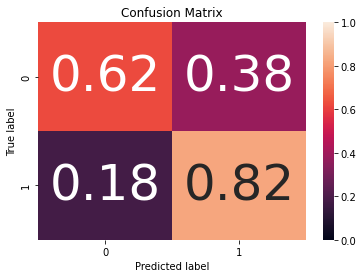

In [61]:
# visualising cm

cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title = 'Confusion Matrix')

In [62]:
# 61% true negative, 81 true positive

In [63]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP), & True Negative (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP) 

# Sensitivity, hit rate, recall, or true positive rate * main metric
TPR = TP / (TP + FN)
print('The true Positive Rate is: ', TPR)

# Precision or positive predictive value * main metric
PPV = TP / (TP + FP)
print('The presision is: ', PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print('The False positive is: ', FPR)

# False negative rate or Miss rate
FNR = FN / (FN + TP)
print('The False Negative Rate is: ', FNR)

print('\n')

## Total averages :
print('The average True Positive Rate is: ', TPR.sum()/2)
print('The average presision is: ', PPV.sum()/2)
print('The average False positive is: ', FPR.sum()/2)
print('The average False Negative Rate is: ', FNR.sum()/2)

The true Positive Rate is:  [0.62297735 0.82116788]
The presision is:  [0.72368421 0.74339207]
The False positive is:  [0.17883212 0.37702265]
The False Negative Rate is:  [0.37702265 0.17883212]


The average True Positive Rate is:  0.7220726147449981
The average presision is:  0.7335381405054486
The average False positive is:  0.27792738525500205
The average False Negative Rate is:  0.27792738525500205


In [64]:
#Log loss training
print('The log loss training is: ', log_loss(y_train, pred_proba))

# Log loss on testing
pred_proba_t = log_reg.predict_proba(X_test)
print('The Log Loss on testing Dataset is: ', log_loss(y_test, pred_proba_t))

The log loss training is:  0.5663030376998458
The Log Loss on testing Dataset is:  0.621329401694679


## Hyperparameter tuning

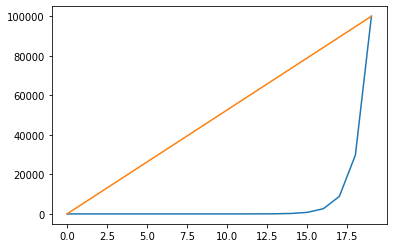

In [65]:
# Creating range for C values (Tuning c parameter)
np.geomspace(1e-5, 1e5, num = 20)

#plot
plt.plot(np.geomspace(1e-5, 1e5, num = 20))
plt.plot(np.linspace(1e-5, 1e5, num = 20))

The CA of C parameter 1e-05 is 0.605:
The Log loss of C parameter 1e-05 is 0.621329401694679:



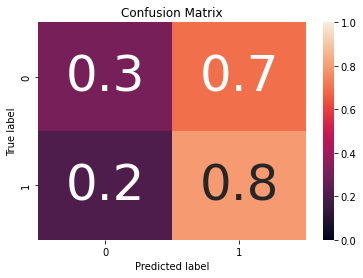

The CA of C parameter 3.359818286283781e-05 is 0.61:
The Log loss of C parameter 3.359818286283781e-05 is 0.621329401694679:



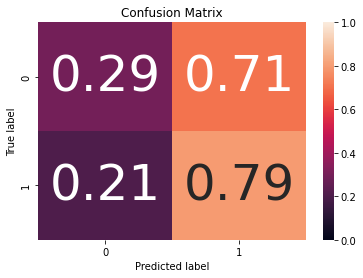

The CA of C parameter 0.00011288378916846884 is 0.6225:
The Log loss of C parameter 0.00011288378916846884 is 0.621329401694679:



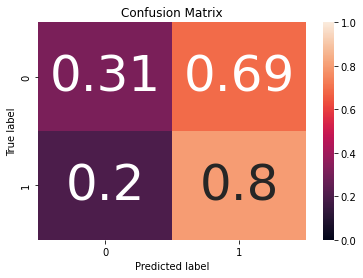

The CA of C parameter 0.000379269019073225 is 0.6375:
The Log loss of C parameter 0.000379269019073225 is 0.621329401694679:



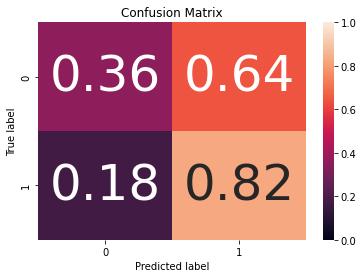

The CA of C parameter 0.0012742749857031334 is 0.65:
The Log loss of C parameter 0.0012742749857031334 is 0.621329401694679:



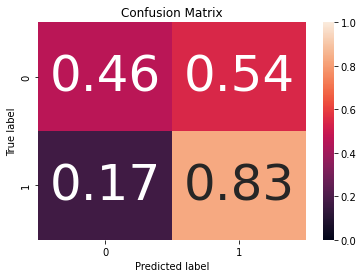

The CA of C parameter 0.004281332398719391 is 0.685:
The Log loss of C parameter 0.004281332398719391 is 0.621329401694679:



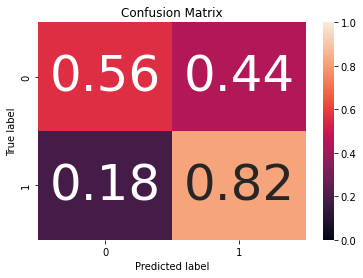

The CA of C parameter 0.01438449888287663 is 0.6775:
The Log loss of C parameter 0.01438449888287663 is 0.621329401694679:



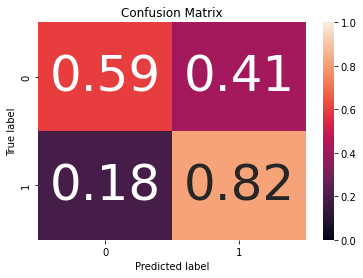

The CA of C parameter 0.04832930238571752 is 0.6925:
The Log loss of C parameter 0.04832930238571752 is 0.621329401694679:



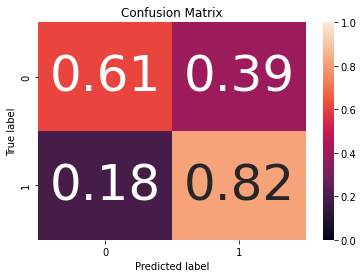

The CA of C parameter 0.1623776739188721 is 0.6875:
The Log loss of C parameter 0.1623776739188721 is 0.621329401694679:



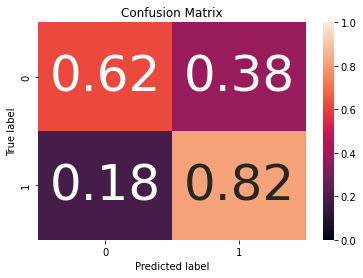

The CA of C parameter 0.5455594781168515 is 0.6975:
The Log loss of C parameter 0.5455594781168515 is 0.621329401694679:



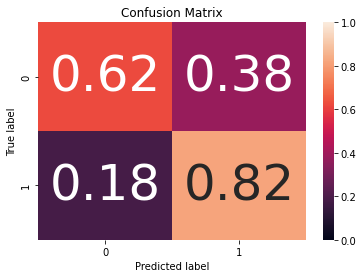

The CA of C parameter 1.8329807108324339 is 0.7025:
The Log loss of C parameter 1.8329807108324339 is 0.621329401694679:



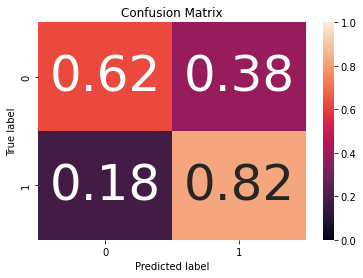

The CA of C parameter 6.1584821106602545 is 0.7025:
The Log loss of C parameter 6.1584821106602545 is 0.621329401694679:



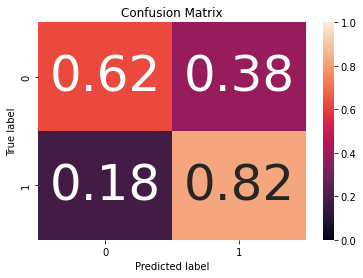

The CA of C parameter 20.6913808111479 is 0.7025:
The Log loss of C parameter 20.6913808111479 is 0.621329401694679:



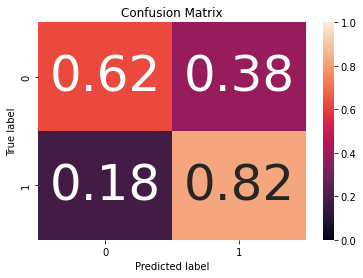

The CA of C parameter 69.51927961775606 is 0.7:
The Log loss of C parameter 69.51927961775606 is 0.621329401694679:



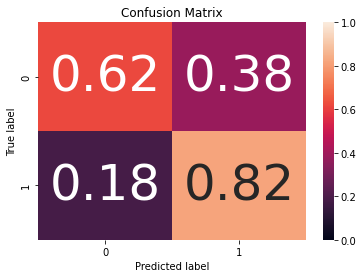

The CA of C parameter 233.57214690901213 is 0.7:
The Log loss of C parameter 233.57214690901213 is 0.621329401694679:



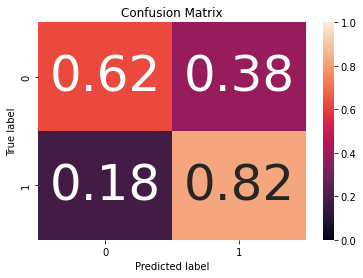

The CA of C parameter 784.7599703514607 is 0.7:
The Log loss of C parameter 784.7599703514607 is 0.621329401694679:



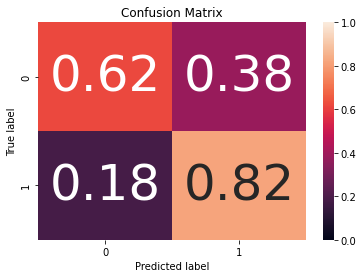

The CA of C parameter 2636.6508987303555 is 0.6975:
The Log loss of C parameter 2636.6508987303555 is 0.621329401694679:



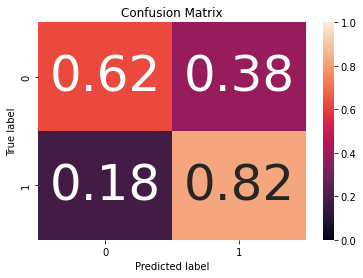

The CA of C parameter 8858.667904100832 is 0.7:
The Log loss of C parameter 8858.667904100832 is 0.621329401694679:



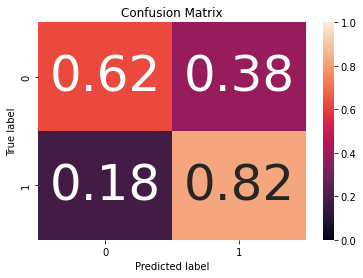

The CA of C parameter 29763.51441631313 is 0.7:
The Log loss of C parameter 29763.51441631313 is 0.621329401694679:



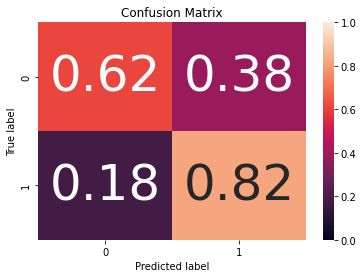

The CA of C parameter 100000.0 is 0.7:
The Log loss of C parameter 100000.0 is 0.621329401694679:



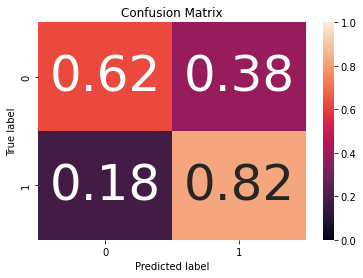

In [66]:
# Looping over the parameters 

C_List = np.geomspace(1e-5, 1e5, num = 20)
CA = []
Logarithmic_Loss = []

for c in C_List:
    log_reg2 = LogisticRegression(random_state = 10, solver = 'liblinear', C=c)
    log_reg2.fit(X_train, y_train)
    score = log_reg2.score(X_test, y_test)
    CA.append(score)
    print("The CA of C parameter {} is {}:".format(c, score))
    pred_proba_t = log_reg.predict_proba(X_test)
    log_loss2 = log_loss(y_test, pred_proba_t)
    Logarithmic_Loss.append(log_loss2)
    print('The Log loss of C parameter {} is {}:'.format(c, log_loss2))
    print('')
    
    y_pred = log_reg2.predict(X_train)
    cm = confusion_matrix(y_train, y_pred)
    cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
    plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title = 'Confusion Matrix')
    plt.show()
    

In [67]:
# putting outcomes on table

# reshaping
CA2 = np.array(CA).reshape(20,)
Logarithmic_Loss2 = np.array(Logarithmic_Loss).reshape(20,)

# zip 
outcomes = zip(C_List, CA2, Logarithmic_Loss2)

# df

df_outcomes = pd.DataFrame(outcomes, columns = ['C_List', 'CA2', 'Logarithmic_Loss2'])

# print 
df_outcomes

# Ordering the data (sort values)
df_outcomes.sort_values("Logarithmic_Loss2", ascending = True).reset_index()

,index,C_List,CA2,Logarithmic_Loss2
0,0,0.000010,0.6050,0.621329
1,17,8858.667904,0.7000,0.621329
2,16,2636.650899,0.6975,0.621329
3,15,784.759970,0.7000,0.621329
4,14,233.572147,0.7000,0.621329
5,13,69.519280,0.7000,0.621329
6,12,20.691381,0.7025,0.621329
7,11,6.158482,0.7025,0.621329
8,10,1.832981,0.7025,0.621329
9,9,0.545559,0.6975,0.621329


In [68]:
# Training dummyClassifier

from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy = "most_frequent")
dummy_clf.fit(X_train, y_train)
score = dummy_clf.score(X_test, y_test)

pred_proba_t = dummy_clf.predict_proba(X_test)
log_loss2 = log_loss(y_test, pred_proba_t)

print('Testing Accuracy:', score)
print('Log Loss', log_loss2)

Testing Accuracy: 0.53
Log Loss 16.233224905608022


## Final Model with Selected Parameters

In [69]:
# Final model 

log_reg3 = LogisticRegression(random_state = 10, solver = 'liblinear', C=0.000034)
log_reg3.fit(X_train, y_train)
score = log_reg3.score(X_valid, y_valid)

pred_proba_t = log_reg3.predict_proba(X_valid)
log_loss2 = log_loss(y_valid, pred_proba_t)

print('Testing Accuracy:', score)
print('Log Loss', log_loss2)

Testing Accuracy: 0.58125
Log Loss 0.6725015237928441


## 2. Decision Tree 

In [70]:
treeModel=DecisionTreeClassifier(criterion='entropy')


In [71]:
treeModel.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [72]:
treePredictions = treeModel.predict(X_test)
treeScore = accuracy_score(y_test, treePredictions)
print(treeScore)
# print(y_test.head())
# print(predictions[:5])

0.6775


## 3. K-Nearest Neighbors 

In [73]:
knnModel=KNeighborsClassifier(n_neighbors=5)

In [74]:
knnModel.fit(X_train,y_train)

KNeighborsClassifier()

In [75]:
knnPredictions = knnModel.predict(X_test)
knnScore = accuracy_score(y_test, knnPredictions)
print(knnScore)

0.56


## 4. Support Vector Machine

In [76]:
svmModel=svm.SVC(kernel='linear')

In [77]:
svmModel.fit(X_train,y_train)

SVC(kernel='linear')

In [78]:
svmPredictions = svmModel.predict(X_test)
svmScore = accuracy_score(y_test, svmPredictions)
print(svmScore)

0.705


## ROC Curve

In [79]:
# predict Probabilities
r_probs = [0 for _ in range(len(y_test))]
log_probs = log_reg.predict_proba(X_test)
tree_probs = treeModel.predict_proba(X_test)

In [80]:
log_probs = log_probs[:, 1]
tree_probs = tree_probs[:, 1]

In [81]:
#Calculate Area Under Curve (AUROC)

r_auc = roc_auc_score(y_test, r_probs)
log_auc = roc_auc_score(y_test, log_probs.reshape(-1,1))
tree_auc = roc_auc_score(y_test, tree_probs)

In [82]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Logistic Regression Prediction: AUROC = %.3f' % (log_auc))
print('Decision Tree Prediction: AUROC = %.3f' % (tree_auc))

Random (chance) Prediction: AUROC = 0.500
Logistic Regression Prediction: AUROC = 0.714
Decision Tree Prediction: AUROC = 0.674


In [83]:
#Calculate ROC curve
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
log_fpr, log_tpr, _ = roc_curve(y_test, log_probs)
tree_fpr, tree_tpr, _ = roc_curve(y_test, tree_probs)

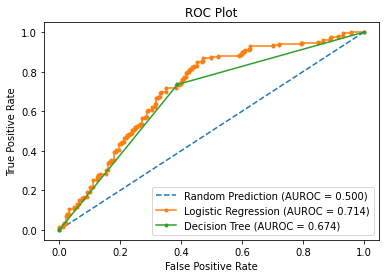

In [84]:
# Plot ROC curve 

plt.plot(r_fpr, r_tpr, linestyle = '--', label = 'Random Prediction (AUROC = %0.3f)' % r_auc)
plt.plot(log_fpr, log_tpr, marker = '.', label = 'Logistic Regression (AUROC = %0.3f)' % log_auc)
plt.plot(tree_fpr, tree_tpr, marker = '.', label = 'Decision Tree (AUROC = %0.3f)' % tree_auc)

# Title
plt.title('ROC Plot')
# Axis Labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #
# Show plot
plt.show()